<a href="https://colab.research.google.com/github/aditya-pandey-ai/PRODIGY_ML_02/blob/main/Customer_Segmentation_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [13]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [31]:
missing_values = X.isnull().sum()

In [32]:
if missing_values.any():
    # Impute missing values with the mean of each column
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [34]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, n_init=10, random_state=0)

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

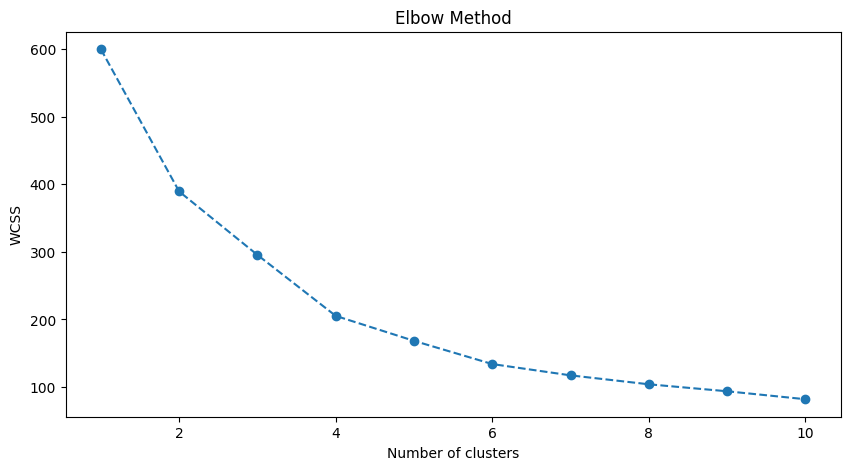

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

In [42]:
df['Cluster'] = clusters

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,NaN,19,15,39,2
1,2,NaN,21,15,81,2
2,3,NaN,20,16,6,3
3,4,NaN,23,16,77,2
4,5,NaN,31,17,40,2


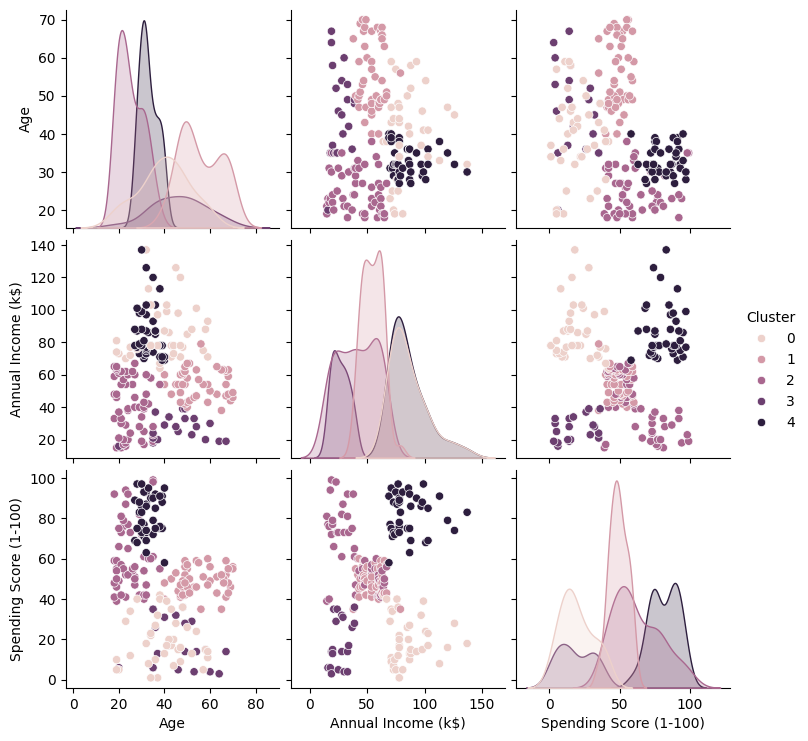

In [45]:
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()


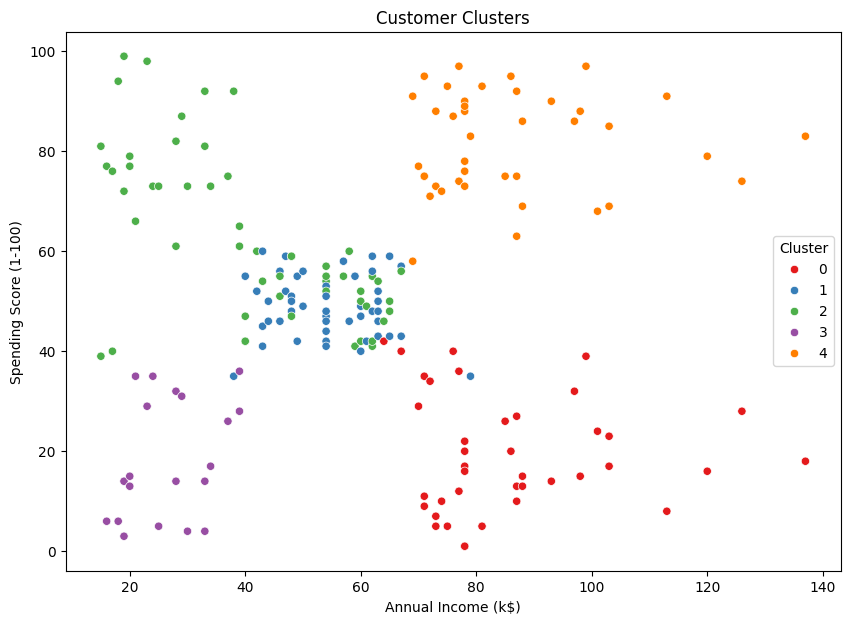

In [47]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [49]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID  Gender        Age  Annual Income (k$)  \
Cluster                                                      
0        159.743590     NaN  39.871795           86.102564   
1         83.872340     NaN  55.638298           54.382979   
2         55.648148     NaN  25.185185           41.092593   
3         24.100000     NaN  46.250000           26.750000   
4        161.025000     NaN  32.875000           86.100000   

         Spending Score (1-100)  
Cluster                          
0                     19.358974  
1                     48.851064  
2                     62.240741  
3                     18.350000  
4                     81.525000  
